In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats  # 과학용 계산 라이브러리
from sklearn.datasets import load_linnerud

liner = load_linnerud()
liner.keys()

dict_keys(['data', 'feature_names', 'target', 'target_names', 'frame', 'DESCR', 'data_filename', 'target_filename', 'data_module'])

In [56]:
df = pd.DataFrame(liner.data, columns=liner.feature_names)
df.head()

,Chins,Situps,Jumps
0,5.0,162.0,60.0
1,2.0,110.0,60.0
2,12.0,101.0,101.0
3,12.0,105.0,37.0
4,13.0,155.0,58.0


In [57]:
df_target = pd.DataFrame(liner.target, columns=liner.target_names)
df_target.head()

,Weight,Waist,Pulse
0,191.0,36.0,50.0
1,189.0,37.0,52.0
2,193.0,38.0,58.0
3,162.0,35.0,62.0
4,189.0,35.0,46.0


In [58]:
df['Waist'] = df_target['Waist']
df.head()

,Chins,Situps,Jumps,Waist
0,5.0,162.0,60.0,36.0
1,2.0,110.0,60.0,37.0
2,12.0,101.0,101.0,38.0
3,12.0,105.0,37.0,35.0
4,13.0,155.0,58.0,35.0


In [59]:
df.isnull().sum()

Chins     0
Situps    0
Jumps     0
Waist     0
dtype: int64

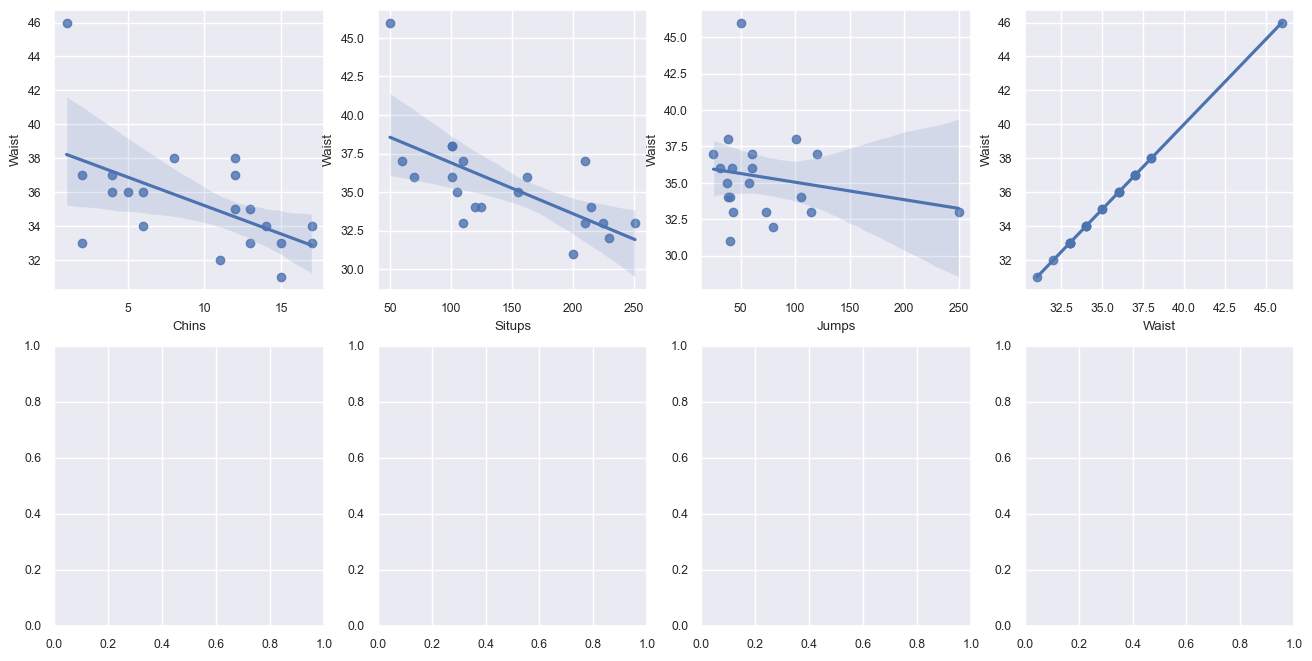

In [60]:
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)

lm_features = ['Chins', 'Situps', 'Jumps','Waist']

# i에는 인덱스가 feature에는 RM ~ RAD까지 순차적으로 들어감
for i, feature in enumerate(lm_features):
    row = int(i/4) # 2행
    col = i%4

    # sns.regplot : 회귀직선을 그려줌
    sns.regplot(x=feature, y='Waist', data=df, ax=axs[row][col])

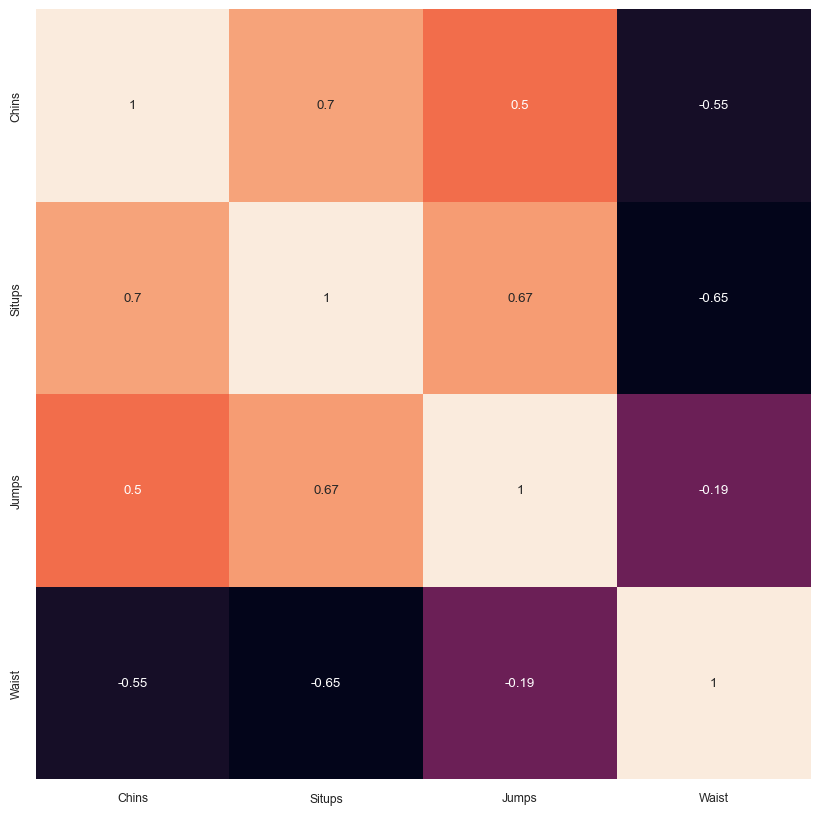

In [61]:
#상관 관계 행렬
df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [63]:
from sklearn.model_selection import train_test_split

x_data=df.loc[:, ['Chins', 'Situps', 'Jumps']]
y_data=df.loc[:, 'Waist']

In [64]:
X_train, X_test, y_train, y_test=train_test_split(x_data,
                                                  y_data,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=12)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(16, 3) (16,)
(4, 3) (4,)


In [65]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [66]:
print("회귀계수(기울기):", np.round(lr.coef_, 1)) #np: numpy, coef_: 피처에 대한 회귀 계수 값
print("상수항(절편):", np.round(lr.intercept_, 1))  #intercept_: 상수항(절편) 값

회귀계수(기울기): [-0.1 -0.   0. ]
상수항(절편): 38.7


In [67]:
y_preds = lr.predict(X_test)
print(X_train.shape, X_test.shape)

(16, 3) (4, 3)


In [68]:
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
print(f'MSE : {mse:.3f}, RMSE: {rmse:.3f}')
print(f'Variance score : {r2_score(y_test, y_preds):.3f}')

MSE : 24.335, RMSE: 4.933
Variance score : 0.196


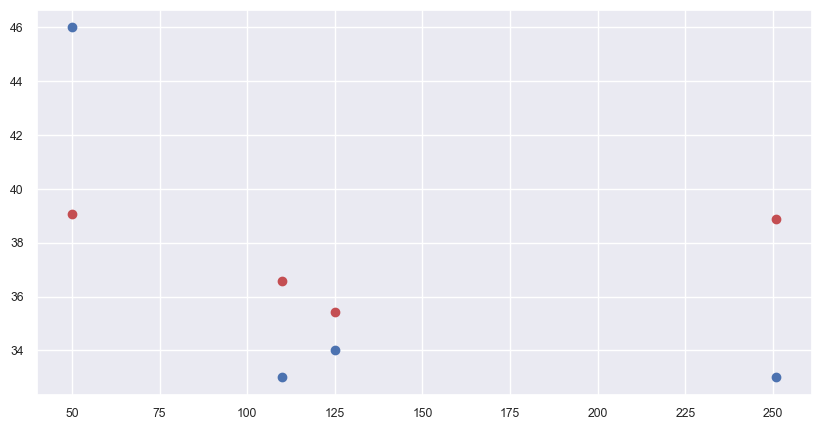

In [69]:
#예측값 저장
y_test_pred=lr.predict(X_test)

plt.figure(figsize=(10,5))
plt.scatter(X_test['Situps'], y_test, label='y_test')
plt.scatter(X_test['Situps'], y_test_pred, c='r', label='y_pred')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()           

In [70]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [71]:
from sklearn.linear_model import Ridge
rd = Ridge()
rd.fit(X_train,y_train)
print('훈련점수 :',rd.score(X_train,y_train))
print('테스트점수 :',rd.score(X_test,y_test))

훈련점수 : 0.758451754152679
테스트점수 : 0.24716336181815313


In [72]:
train_score = []
test_score = []

In [73]:
alpha_list = [0.001,0.01,0.1,1,10,100]
for alpha in alpha_list:
    rd = Ridge(alpha = alpha)
    rd.fit(X_train,y_train)
    train_score.append(rd.score(X_train,y_train))
    test_score.append(rd.score(X_test,y_test))

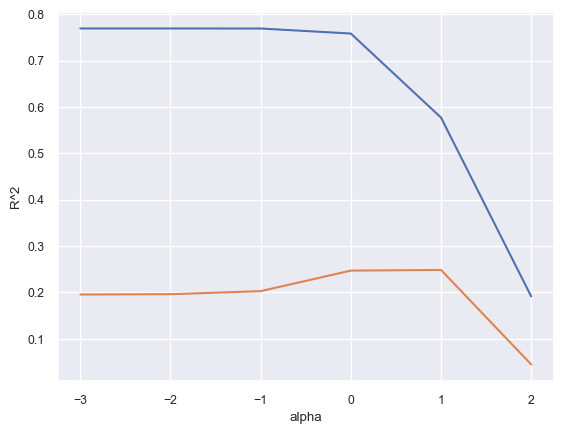

In [74]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [75]:
rd = Ridge(alpha = 10)
rd.fit(X_train,y_train)
print('훈련점수 :', rd.score(X_train,y_train))
print('테스트점수 :',rd.score(X_test,y_test))

훈련점수 : 0.5771608309414578
테스트점수 : 0.24856550804695188


In [76]:
from sklearn.linear_model import Lasso
la = Lasso()
la.fit(X_train, y_train)
print('훈련점수 :',la.score(X_train,y_train))
print('테스트점수 :',la.score(X_test,y_test))

훈련점수 : 0.23550538517475905
테스트점수 : 0.06890955002465848


In [77]:
train_score = []
test_score = []

In [78]:
alpha_list = [0.001,0.01,0.1,1,10,100]
for alpha in alpha_list:
    la = Lasso(alpha = alpha)
    la.fit(X_train,y_train)
    train_score.append(la.score(X_train,y_train))
    test_score.append(la.score(X_test,y_test))

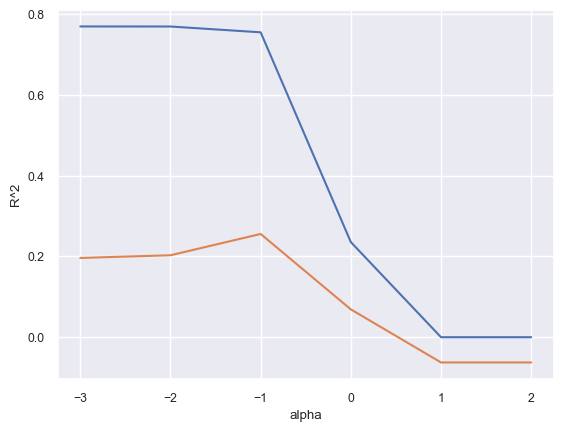

In [79]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [80]:
la = Lasso(alpha = 0.1)
la.fit(X_train,y_train)
print('훈련점수 :',la.score(X_train,y_train))
print('테스트점수 :',la.score(X_test,y_test))

훈련점수 : 0.7548856207811071
테스트점수 : 0.25561421384616734


In [81]:
np.sum(la.coef_==0)

0